# <span style="color: green"> Laboratorio di Simulazione Numerica (NSL) </span>
## <span style="color: blue">  Esercitazione 12</span>

## Machine Learning(ML): classificazione con reti neurali profonde (DNNs) e con reti neurali convoluzionali (CNNs)

L'**obiettivo** della dodicesima esercitazione consiste nel costruire un modello di rete neurale profonda (appoggiandosi alla libreria **Keras**) che consenta di riconoscere e distinguere tra dieci cifre digitali scritte a mano (0,...,9).

Nel paradigma dell'**apprendimento supervisionato** tale task viene categorizzato come un problema di **classificazione** e in particolare specializzato nel riconoscimento di immagini. Il dataset di Input con dati *etichettati* è rappresentato dal cosiddeto MNIST data che contiene 70000 immagini, con cifre digitali scritte a mano, di 28 x 28 **pixel**  in scala di grigi (con 255 gradiazioni possibili per ciascun pixel). Il numero di classi di output (le cifre da distinguere) sono 10.

Per affrontare questo task vengono impiegate anche delle reti neurali **convoluzionali (CNNs)** che si avvantaggiano delle strutture addizionali presenti in tale problema, ossia le proprietà di località e di invarianza traslazionale. Le CNNs ammettono due principali layers:

1) Il **layer convoluzionale** che esegue un operazione di convoluzione sull'input con una serie di *filtri*.

2) Il **layer di pooling** che effettua un'operazione di *coarse-grain* (sgranamento) sull'input mantenendo inalterate la località e la struttura spaziale.


Nel caso concreto dell'esercitazione per dati bidimensionali (le immagini) un layer l è caratterizzato da **altezza** ($H_l = 28$), **larghezza** ($W_l = 28$) che rappresentano le dimensioni dell'immagine (pixel) e **numero di canali** o profondità ($D_l = 1 $ in scala di grigi).

Dati questi brevi accenni qui dis guito verrà costruito un primo modello di rete, usando per ora solo layer densi, per tentare di risolvere il task di classificazione.

### Esercizio 12.1: rete neurale profonda (DNN)

A partire dall'implementazione già disponibile nel jupiter delle consegne si testano le performances dalla rete con diversi **ottimizzatori**.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In questa prima cella vengono imporate tutte le librerie e le classi necessarie e si fissa il seme del generatore di numeri casuali.

In [ ]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


Qui sopra vengono scaricati gli MNIST data in modo che siano già partizonati nei gruppi di training e test.

an example of a data point with label 4


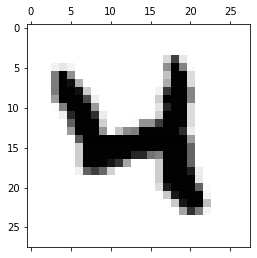

an example of a data point with label 4 before to_categorical ...
... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [ ]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

print('an example of a data point with label', Y_train[20], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

L'utility di Keras *to_categorical* permette di convertire un array di labels suddivisi in classi in una matrice binaria (con entrate 0 o 1) con un numero di colonne tante quante sono le classi del task (10) e righe pari alla dimensione dell'array di partenza (28 x 28 = 784). Questa operazione è fondamentale per poter usare, in seguito, come funzione perdita la *categorical_crossentropy*.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


Nella cella precedente è stata definita l'architettura della rete. Si osservi la funzione di attivazione **softmax** nel layer di output che normalizza gli input nell'intervallo $[0,1)$ assegnando una probabilità all'output distribuita tra le 10 classi possibili.

In [ ]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam

1) **Stochastich Gradient Descent (SGD)**

In [ ]:
def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


La **metrica** *accuracy* viene spesso impiegata nei problemi di classificazione e rappresenta la percentuale di dati di apprendimento classificati in modo corretto. 

La metrica, si ricordi, è una misura quantitativa delle performances del modello adottato (un test).

In [ ]:
# training parameters
batch_size = 32
#epochs = 15
#epochs = 20
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 158us/step - loss: 0.7563 - acc: 0.7780 - val_loss: 0.3097 - val_acc: 0.9184
Epoch 2/5
60000/60000 [==============================] - 10s 164us/step - loss: 0.3794 - acc: 0.8923 - val_loss: 0.2353 - val_acc: 0.9345
Epoch 3/5
60000/60000 [==============================] - 9s 155us/step - loss: 0.3057 - acc: 0.9133 - val_loss: 0.1996 - val_acc: 0.9407
Epoch 4/5
60000/60000 [==============================] - 10s 163us/step - loss: 0.2664 - acc: 0.9257 - val_loss: 0.1729 - val_acc: 0.9497
Epoch 5/5
60000/60000 [==============================] - 10s 160us/step - loss: 0.2330 - acc: 0.9346 - val_loss: 0.1540 - val_acc: 0.9536


10000/10000 [==============================] - 1s 52us/step

Test loss: 0.1539617390729487
Test accuracy: 0.9535999894142151


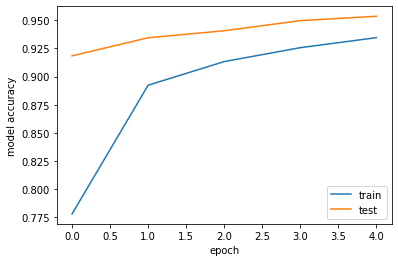

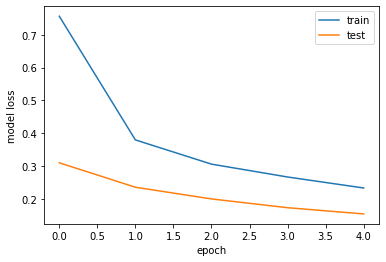

In [ ]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

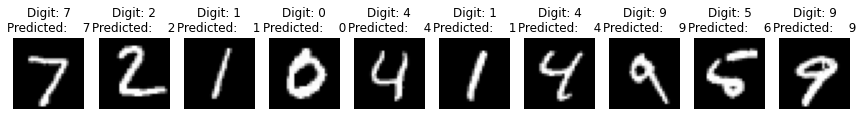

In [ ]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

- Con sole 5 epoche le performance del SGD sono piuttosto scarse (rispeto a tutti gli ottimizzatori testati successivamente). Occorrerebbero circa 20 epoche per realizzare la convergenza ed ottenere esiti soddisfacenti.

2) **Adam**

In [ ]:
def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(learning_rate=0.003),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [ ]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 15s 256us/step - loss: 0.2728 - acc: 0.9216 - val_loss: 0.1325 - val_acc: 0.9602
Epoch 2/5
60000/60000 [==============================] - 16s 265us/step - loss: 0.1440 - acc: 0.9602 - val_loss: 0.1263 - val_acc: 0.9649
Epoch 3/5
60000/60000 [==============================] - 16s 265us/step - loss: 0.1174 - acc: 0.9664 - val_loss: 0.1237 - val_acc: 0.9652
Epoch 4/5
60000/60000 [==============================] - 16s 263us/step - loss: 0.1051 - acc: 0.9706 - val_loss: 0.1104 - val_acc: 0.9715
Epoch 5/5
60000/60000 [==============================] - 16s 269us/step - loss: 0.0960 - acc: 0.9739 - val_loss: 0.1075 - val_acc: 0.9740


10000/10000 [==============================] - 1s 51us/step

Test loss: 0.10752087648841152
Test accuracy: 0.9739999771118164


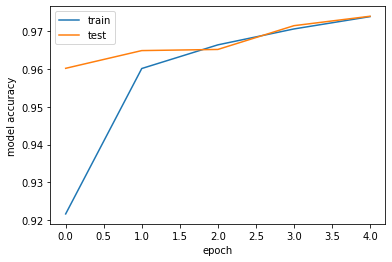

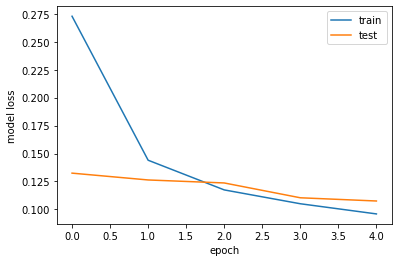

In [ ]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

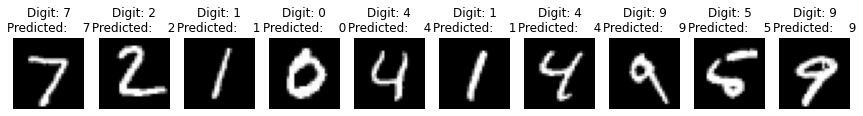

In [ ]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

3) **Adagrad**

In [ ]:
def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adagrad(lr=0.03, decay=0.0),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [ ]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 203us/step - loss: 0.2665 - acc: 0.9280 - val_loss: 0.1121 - val_acc: 0.9669
Epoch 2/5
60000/60000 [==============================] - 12s 201us/step - loss: 0.1177 - acc: 0.9663 - val_loss: 0.0906 - val_acc: 0.9733
Epoch 3/5
60000/60000 [==============================] - 13s 210us/step - loss: 0.0844 - acc: 0.9761 - val_loss: 0.0772 - val_acc: 0.9781
Epoch 4/5
60000/60000 [==============================] - 12s 208us/step - loss: 0.0661 - acc: 0.9811 - val_loss: 0.0709 - val_acc: 0.9785
Epoch 5/5
60000/60000 [==============================] - 12s 192us/step - loss: 0.0530 - acc: 0.9851 - val_loss: 0.0704 - val_acc: 0.9802


10000/10000 [==============================] - 1s 56us/step

Test loss: 0.07040261221158435
Test accuracy: 0.9801999926567078


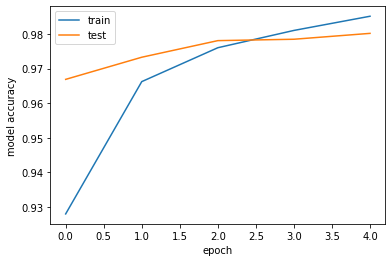

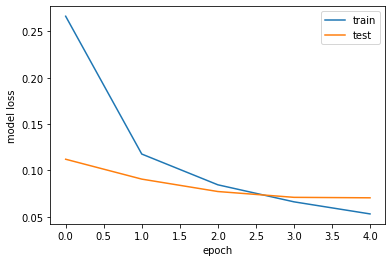

In [ ]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

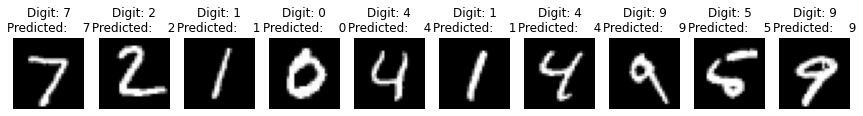

In [ ]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

4) **Adadelta**

In [ ]:
def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adadelta(lr=0.8, rho=0.95, decay=0.0),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [ ]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 19s 323us/step - loss: 0.3066 - acc: 0.9099 - val_loss: 0.1166 - val_acc: 0.9635
Epoch 2/5
60000/60000 [==============================] - 19s 322us/step - loss: 0.1368 - acc: 0.9612 - val_loss: 0.0854 - val_acc: 0.9734
Epoch 3/5
60000/60000 [==============================] - 16s 268us/step - loss: 0.0947 - acc: 0.9722 - val_loss: 0.0793 - val_acc: 0.9767
Epoch 4/5
60000/60000 [==============================] - 17s 277us/step - loss: 0.0797 - acc: 0.9769 - val_loss: 0.0755 - val_acc: 0.9776
Epoch 5/5
60000/60000 [==============================] - 16s 268us/step - loss: 0.0655 - acc: 0.9813 - val_loss: 0.0694 - val_acc: 0.9804


10000/10000 [==============================] - 1s 61us/step

Test loss: 0.06944823103449525
Test accuracy: 0.980400025844574


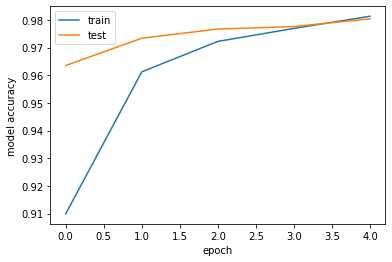

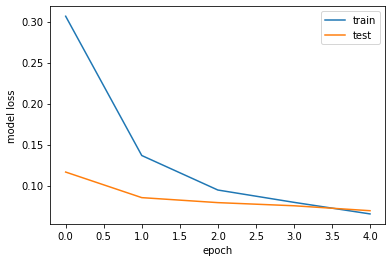

In [ ]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

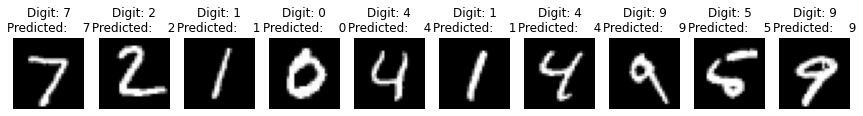

In [ ]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

5) **Adamax**

In [ ]:
def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adamax(learning_rate=0.001),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [ ]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# training parameters
batch_size = 32
#epoch = 7
#epoch = 8
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 14s 233us/step - loss: 0.4192 - acc: 0.8788 - val_loss: 0.1652 - val_acc: 0.9509
Epoch 2/5
60000/60000 [==============================] - 17s 279us/step - loss: 0.1992 - acc: 0.9452 - val_loss: 0.1173 - val_acc: 0.9628
Epoch 3/5
60000/60000 [==============================] - 16s 267us/step - loss: 0.1441 - acc: 0.9590 - val_loss: 0.1001 - val_acc: 0.9688
Epoch 4/5
60000/60000 [==============================] - 15s 246us/step - loss: 0.1160 - acc: 0.9667 - val_loss: 0.0839 - val_acc: 0.9736
Epoch 5/5
60000/60000 [==============================] - 14s 241us/step - loss: 0.0972 - acc: 0.9717 - val_loss: 0.0755 - val_acc: 0.9760


10000/10000 [==============================] - 0s 48us/step

Test loss: 0.07548834135248325
Test accuracy: 0.9760000109672546


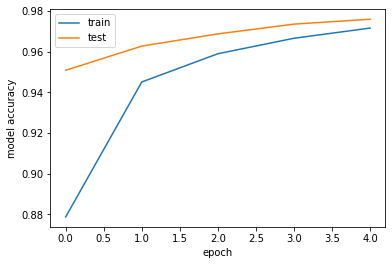

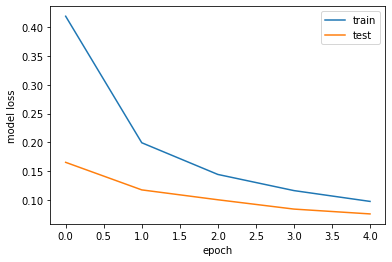

In [ ]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

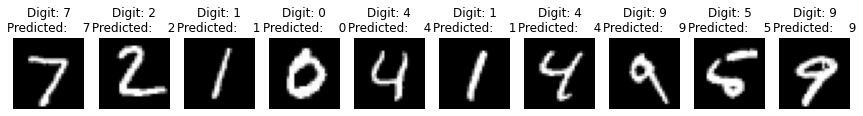

In [ ]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

6) **Nadam**

In [ ]:
def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Nadam(learning_rate=0.002),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [ ]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 17s 290us/step - loss: 0.2583 - acc: 0.9250 - val_loss: 0.1136 - val_acc: 0.9647
Epoch 2/5
60000/60000 [==============================] - 16s 264us/step - loss: 0.1228 - acc: 0.9653 - val_loss: 0.0968 - val_acc: 0.9717
Epoch 3/5
60000/60000 [==============================] - 16s 268us/step - loss: 0.0967 - acc: 0.9718 - val_loss: 0.1493 - val_acc: 0.9639
Epoch 4/5
60000/60000 [==============================] - 16s 270us/step - loss: 0.0822 - acc: 0.9768 - val_loss: 0.0983 - val_acc: 0.9725
Epoch 5/5
60000/60000 [==============================] - 17s 282us/step - loss: 0.0704 - acc: 0.9792 - val_loss: 0.1085 - val_acc: 0.9746


10000/10000 [==============================] - 1s 58us/step

Test loss: 0.1085263454843649
Test accuracy: 0.9746000170707703


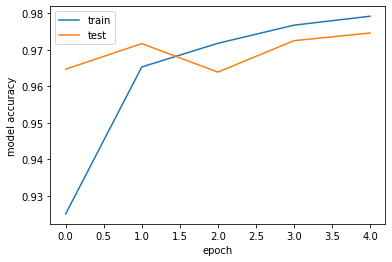

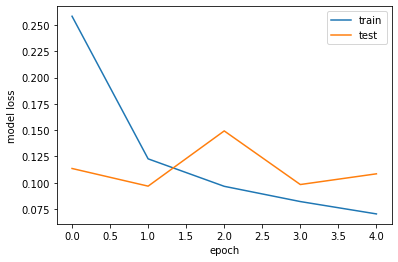

In [ ]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

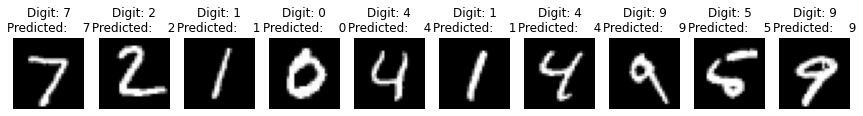

In [ ]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

- Tutti i test degli ottimizzatori sono stati svolti su un numero di epoche di apprendimento pari a $N_{epoch} = 5$ per eseguire dei confronti relativi alle performances interpretando i risultati ottenuti con il **loss test** e l'**accuracy test** e valutando i rispettivi andamenti in funzione del numero di epoche. 

1.   SGD: le epoche non sono sufficienti per realizzare la miglior convergenza tra i dati di train e quelli di validazione (test).
2.   Adam: raggiunge migliori performances sia in termini di loss che di accuracy in 3 epoche con una convergenza rapida, dopodichè inizia ad overfittare i dati ($E_{out} > E{in}$).
3.   Adagrad: performa ancora meglio di Adam, ottenendo la massima convergenza in 2 epoche e mezzo, dopodichè overfitta.
4.   Adadelta: sulla stessa lunghezza d'onda di Adagrad ma con performances **lievemente** migliori (valore minore della funzione costo).
5.   Adamax: come per l'SGD, 5 epoche non bastano a realizzare la completa convergenza ma comunque mostra risultati migliori nello stesso intervallo temporale di apprendimento. (servirebbero almeno 8 epoche per avere risultati comparabili con Adadelta) 
6.   Nadam: Una convergenza rapidissima (poco più di 2 epoche prima di inziare a mostrare segni di overfitting) ma con un valore della funzione costo non così ottimale come Aadelta o Adagrad. 

Per l'SGD e per Adamax si potrebbe provare ad aumentare il numero di epoche per osservare quanto impiegano a raggiungere la convergenza.  

**N.B.**: Le performances sono fortemente influenzate dalla scelta degi argomenti degli ottimizzatori, in particolare del valore del *learning rate* che gioca un ruolo molto importante ai fini dell'efficienza e della convergenza dell'algoritmo. 




### Esercizio 12.2: Reti Neurali Convoluzionali (CNNs)

Nel secondo esercizio è richiesto di arricchire e modificare l'archittettura della precedente DNN aggiungendo dei layer convoluzionali per sfruttare la presenza di **correlazioni spaziali locali** tra i pixel nelle immagini (proprietà di *invarianza traslazionale*) e migliorare l'accurattezza del modello di classificazione.

In [ ]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


Per costruire la nuova rete neurale convoluzionale sono stati introdotti sia layers convoluzionali caratterizzati da un certo numero di filtri di dimensioni opportune, sia pooling layers di tipo **Maxpooling** che riducono le dimensioni degli outputs (meno parametri) mantenendo invariata la profondità (il numero di canali), sia un **Flatten** layer che rettifica i dati in un array unidimensionale.

L'architettura della rete neurale convoluzionale scelta per migliorare l'accuratezza del modello di classificazione è la seguente:

- Un primo layer convoluzionale 2D composto da 10 filtri (la dimensione dello spazio di output) $5 \times 5$ con l'argomento opzionale *input_shape* che specifica la dimensione  e la forma dell'input del primo starto del modello ($28 \times 28 \times 1$) e con funzione di attivazione *RELU*. L'output, dopo l'operazione di convoluzione, diventerà un immagine $24 \times 24 \times 10$.  

- Un primo layer MaxPooling 2D con un filtro $2 \times 2$ per dimezzare la dimensione e sgranare l'immagine sostituendo le regioni progressivamente "investite" dal filtro ($2 \times 2$ neuroni appunto) con un solo neurone di cui l'output è il maggior valore tra gli outputs presenti nella regione. Viene inoltre settato uno **stride** $S=2$ in modo tale che il filtro esplori pixels dell'immagine sempre diversi. Dimensione output finale $12 \times 12 \times 10$.
Il MaxPooling è utile perchè riduce il rischio di *overfitting* (meno parametri) e conserva le aree di maggiore attivazione.

- Un secondo layer convoluzionale 2D da 18 filtri $3 \times 3$ con funzione di attivazione Relu. Dimensioni dell'output $10 \times 10 \times 18$.

- Un secondo layer MaxPooling 2D con un filtro $2 \times 2$ e stride $S=2$. Dimensioni dell'output $5 \times 5 \times 18$.

- Un *flatten* layer che rettifica i dati un array unidimensionale (srotola la matrice).

- Un primo layer **denso** costiutito da $450 = 5 \times 5 \times 18$ neuroni con funzione di attivazione relu.

- Un secondo layer denso composto da $50 neuroni$ con funzione di attivazione relu.

- Un **Dropout** con rate $0.3$. Tale operazione aiuta a prevenire il rischio di overfitting silenziando casualmente alcuni neuroni ad ogni aggiornamento durante la fase di allenamento.

- Un layer di ouput con funzione di attivazione **softmax** con $10$ (digits) output possibili.

Di seguito è riportata l'implementazione, l'allenamento e le predizioni del modello sopra descritto.

In [ ]:
def create_CNN():
    # instantiate model
    model = Sequential() # 28 x 28 x 1
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape)) # 24 x 24 x 10
    # add first MaxPooling layer with strides = 2
    model.add(MaxPooling2D(pool_size=(2, 2),strides = 2, padding = 'valid')) # 12 x 12 x 10
    #add second convolutional layer with 18 filters
    model.add(Conv2D(18, kernel_size=(3, 3),activation='relu')) # 10 x 10 x 18
    # add second MaxPooling layer with strides = 2
    model.add(MaxPooling2D(pool_size=(2, 2),strides = 2, padding = 'valid')) # 5 x 5 x 18
    #add flatten layer
    model.add(Flatten())
    # add first standard dense layer with 
    model.add(Dense(450, activation='relu'))
    # add second standard dense layer with 
    model.add(Dense(50, activation='relu'))
    # apply dropout with rate 0.3
    model.add(Dropout(0.3))
    # add soft-max layer
    model.add(Dense(num_classes, activation='softmax'))

    return model
print('Model architecture created successfully!')

Model architecture created successfully!


In [ ]:
    def compile_model():
        # create the model
        model=create_CNN()
        # compile the model
        model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
        return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [ ]:
# training parameters
batch_size = 32
epochs = 7

# create the deep neural net
model_CNN = compile_model()

# train DNN and store training info in history
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/7
60000/60000 [==============================] - 44s 730us/step - loss: 0.6382 - acc: 0.7977 - val_loss: 0.1684 - val_acc: 0.9484
Epoch 2/7
60000/60000 [==============================] - 41s 689us/step - loss: 0.2049 - acc: 0.9376 - val_loss: 0.0945 - val_acc: 0.9687
Epoch 3/7
60000/60000 [==============================] - 41s 685us/step - loss: 0.1434 - acc: 0.9583 - val_loss: 0.0794 - val_acc: 0.9754
Epoch 4/7
60000/60000 [==============================] - 42s 707us/step - loss: 0.1153 - acc: 0.9656 - val_loss: 0.0624 - val_acc: 0.9804
Epoch 5/7
60000/60000 [==============================] - 46s 761us/step - loss: 0.0984 - acc: 0.9710 - val_loss: 0.0533 - val_acc: 0.9835
Epoch 6/7
60000/60000 [==============================] - 41s 677us/step - loss: 0.0852 - acc: 0.9748 - val_loss: 0.0451 - val_acc: 0.9850
Epoch 7/7
60000/60000 [==============================] - 41s 683us/step - loss: 0.0746 - acc: 0.9776 - val_loss: 0.0449 - 

10000/10000 [==============================] - 3s 255us/step

Test loss: 0.04493697475103545
Test accuracy: 0.9847000241279602


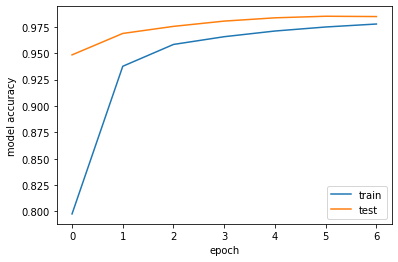

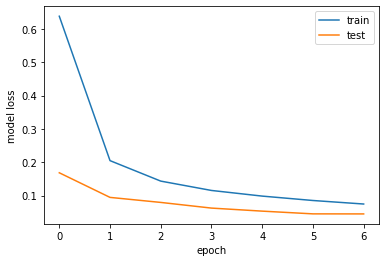

In [ ]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()



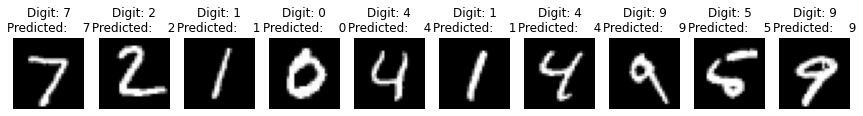

In [ ]:
predictions = model_CNN.predict(X_test)

plt.figure(figsize=(15, 15)) 
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off')
plt.show()


- Le performances di questa rete sono molto buone considerando che è stato usato come ottimizzatore lo SGD che precedentemente si era rivelato essere il peggiore tra quelli possibili. In particolare i risultati in termini di accuratezza risultano essere addirittura migliori di quelli ottenuti con le reti neurali profonde usando ottimizzatori più performanti (vedi Adagrad per esempio).

- Le predizioni del modello sui dati di allenamento sono infallibili (vedi ultima cella).

- Nonostante tutti gli accorgimenti il modello possiede molti più parametri e quindi, con un numero di epoche simili, richiede molto più tempo il suo allenamento.

- Sono state usate un numero di epoche $N_{epoch} = 7$, necessarie per arrivare a convergenza ma senza cadere nella *trappola* dell'overfitting. 

### Esercizio 12.3

Nell'ultimo esercizio è richiesto di testare se la rete convoluzionale precedentemente costruita ed allenata sia in grado di riconoscere delle cifre scritte a mano create con l'applicazione *gimp*.

In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()

Saving 0.png to 0.png
Saving 1.png to 1 (1).png
Saving 2.png to 2.png
Saving 3.png to 3.png
Saving 4.png to 4.png
Saving 5.png to 5.png
Saving 6.png to 6.png
Saving 7.png to 7.png
Saving 8.png to 8.png
Saving 9.png to 9.png


**N.B.**: avendo usato colab per questa esercitazione, qui sopra ho scritto un paio di celle per importare e caricare i file contenenti le immagini.

Image size: 28x28


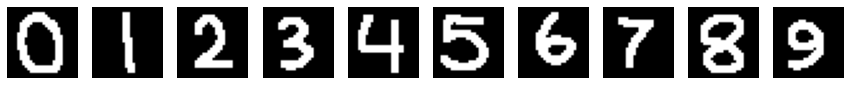

In [ ]:
from PIL import Image
import os

digit_filename = "0.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in.load();
data = np.zeros((10,xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[0,i,j]=pix[j,i]/255

digit_filename = "1.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[1,i,j]=pix[j,i]/255
        
digit_filename = "2.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[2,i,j]=pix[j,i]/255
        
digit_filename = "3.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[3,i,j]=pix[j,i]/255

digit_filename = "4.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[4,i,j]=pix[j,i]/255

digit_filename = "5.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[5,i,j]=pix[j,i]/255

digit_filename = "6.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[6,i,j]=pix[j,i]/255

digit_filename = "7.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[7,i,j]=pix[j,i]/255

digit_filename = "8.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[8,i,j]=pix[j,i]/255

digit_filename = "9.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[9,i,j]=pix[j,i]/255

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(data[i, :, :], cmap='gray')        
    plt.axis('off') 
plt.show()



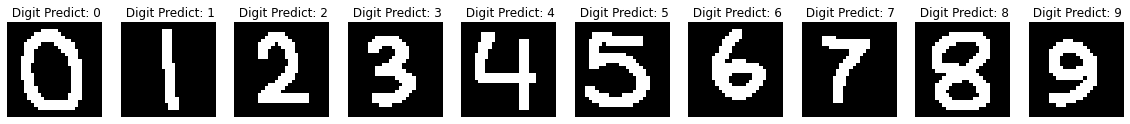

In [ ]:
if keras.backend.image_data_format() == 'channels_first':
    data = data.reshape(data.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    data = data.reshape(data.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


predictions = model_CNN.predict(data)
plt.figure(figsize=(20, 20)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(data[i, :, :, 0], cmap='gray')    
    plt.title(" Digit Predict: {}".format(np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()


- La rete neurale convoluzionale sviluppata riconosce tutte le cifre scritte a mano dimostrandosi molto performativa persino nell'effettuare predizioni su digit mai visti, sui quali non è stata trainata.